# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=AUD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=AUD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
btc_price = btc_price['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = requests.get(eth_url).json()
eth_price = eth_price['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49112.40
The current value of your 5.3 ETH is $14936.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
api_key = os.getenv('ALPACA_API_KEY')
api_key_secret = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    api_key_secret,
    api_version = 'V2',)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-08-03", tz = 'America/New_York').isoformat()
five_years = pd.Timestamp("2016-08-03", tz = 'America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
alpaca_data = alpaca.get_barset(
    tickers, 
    timeframe,
    start = None,
    end = None,
    limit = 1).df

# Preview DataFrame
alpaca_data

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-08-05 00:00:00-04:00  116.46  116.48  116.28  116.32  3170931  440.22   

                                                             
                             high     low   close    volume  
time                                                         
2021-08-05 00:00:00-04:00  441.85  439.88  441.77  34903127

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(alpaca_data["AGG"]["close"])
spy_close_price = float(alpaca_data["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.32
Current SPY closing price: $441.77


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22088.50
The current value of your 200 AGG shares is $23264.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crpto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value
codes = ['crypto', 'shares']

# Create savings DataFrame
df_savings = {'Amount': [crpto_value, shares_value]}
df_savings = pd.DataFrame(df_savings, index = codes).round(2)

# Display savings DataFrame
display(df_savings)

,Amount
crypto,64048.65
shares,45352.50


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

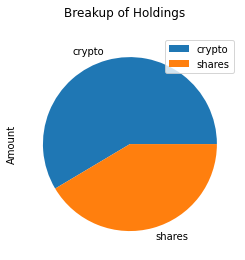

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True, title= "Breakup of Holdings")

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.iloc[:, 0].sum()
total_savings
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations!! You have enough money in this fund.")
elif total_savings == emergency_fund:
    print("Congratulations!! You have reached your financial goal.")
else:
    print(f"You need ${emergency_fund-total_savings:0.2f} to reach you financial goal")


Congratulations!! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-08-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-08-01', tz='America/New_York').isoformat()

In [30]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
"""Can only get 1000 days worth of data from Alpaca, closer to 4 years than 5"""
df_stock_data = alpaca.get_barset(
    tickers, 
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns """NEED TO CHNGE THIS TO 500, 100 IS ONLY A TEST"""
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500, 
    num_trading_days = 252*30)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-08-14 00:00:00-04:00  109.84  109.8969  109.74  109.810  2002026.0   
2017-08-15 00:00:00-04:00  109.56  109.7150  109.56  109.650  1585338.0   
2017-08-16 00:00:00-04:00  109.54  109.9300  109.54  109.840  1570272.0   
2017-08-17 00:00:00-04:00  109.83  110.0200  109.78  110.010  2033497.0   
2017-08-18 00:00:00-04:00  110.05  110.1400  109.89  109.965  1453298.0   

                                           SPY                           \
                          daily_return    open     high     low   close   
time                                                                      
2017-08-14 00:00:00-04:00          NaN     NaN      NaN     NaN     NaN   
2017-08-15 00:00:00-04:00    -0.001457  246.98  247.000  246.16  246.53   
2017-08-16 00:00:00-04:00     0.001733  247.11  247.570  246.45  246.92   
2017-08-17 00:00:00-04:00     0.001548  246.24  246.600  243.10  243.13   
2017-08-18 00:00:00-04:00    -0.000409  242.90  244.189  242.20  242.69   

                                                    
                               volume daily_return  
time                                                
2017-08-14 00:00:00-04:00         NaN          NaN  
2017-08-15 00:00:00-04:00  35274867.0          NaN  
2017-08-16 00:00:00-04:00  44955596.0     0.001582  
2017-08-17 00:00:00-04:00  89435117.0    -0.015349  
2017-08-18 00:00:00-04:00  85934699.0    -0.001810

In [17]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990431,1.012461,0.990033,0.986005,1.008135,0.999242,0.992413,1.012351,1.007076,1.000426,...,0.999008,1.009425,1.012037,0.993369,1.016173,0.993810,1.007177,1.004664,0.993723,0.998562
2,0.994183,1.008467,0.993516,0.987348,1.015247,0.994414,0.993388,1.001970,1.016117,1.005580,...,0.991949,1.015232,0.998258,1.002833,1.022017,0.996746,1.009603,1.014454,0.987158,0.989880
3,0.991407,1.005388,0.998355,1.003611,1.015516,0.994573,0.983190,0.995777,1.032815,1.008470,...,0.986130,1.005907,1.000168,0.986413,1.023539,0.978386,1.023815,1.013619,0.989552,0.989233
4,0.988380,1.010529,1.007768,1.012936,1.020821,0.994297,0.982097,1.000607,1.040096,1.014473,...,0.976638,1.007494,1.005187,0.995636,1.036950,0.979294,1.008539,0.998611,0.977977,0.987932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.798750,18.512178,15.692183,20.552190,36.697105,116.107872,9.920646,3.855631,15.092327,20.841819,...,2.485022,12.875353,9.634130,18.758456,16.443937,43.125659,35.611892,9.363586,18.794414,22.228369
7557,21.008367,18.529292,15.812131,20.659259,36.590101,116.293553,9.845574,3.859449,15.336476,20.993480,...,2.472080,12.742418,9.715360,18.768037,16.607841,43.346369,35.825583,9.263092,18.796777,22.203925
7558,20.847629,18.614107,16.111145,20.799710,36.303732,114.768291,9.888823,3.847961,15.439529,21.143691,...,2.453081,12.778836,9.680707,18.665017,16.801638,42.480270,35.743569,9.335917,18.758427,21.793733
7559,20.815741,18.446167,15.931760,20.760815,36.240876,114.963490,9.841383,3.907298,15.585173,20.971801,...,2.465495,12.797799,9.683850,18.655890,16.734653,43.035339,35.536428,9.363913,18.663891,22.013221


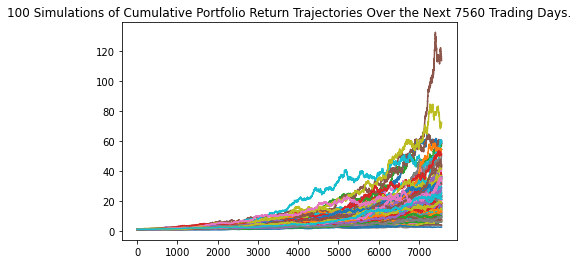

In [18]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

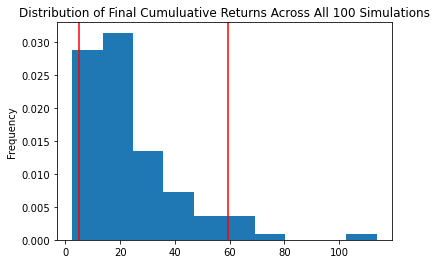

In [19]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [20]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl)

count           100.000000
mean             23.425733
std              17.596037
min               2.452631
25%              11.644699
50%              18.216966
75%              33.018189
max             113.632204
95% CI Lower      4.848061
95% CI Upper     59.475389
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [21]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_tbl[8]*initial_investment,2)
ci_upper = round(summary_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $96961.22 and $1189507.77


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [22]:
# Set initial investment
initial_investment_increased = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_1 = round(summary_tbl[8]*initial_investment_increased,2)
ci_upper_1 = round(summary_tbl[9]*initial_investment_increased,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_increased} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_1} and ${ci_upper_1}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $145441.83 and $1784261.66


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [23]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
"""Using $60000 initial investment as well as increased risk with an 80/20"""
MC_even_dist_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500, 
    num_trading_days = 252*5)

MC_even_dist_five.portfolio_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-08-14 00:00:00-04:00  109.84  109.8969  109.74  109.810  2002026.0   
2017-08-15 00:00:00-04:00  109.56  109.7150  109.56  109.650  1585338.0   
2017-08-16 00:00:00-04:00  109.54  109.9300  109.54  109.840  1570272.0   
2017-08-17 00:00:00-04:00  109.83  110.0200  109.78  110.010  2033497.0   
2017-08-18 00:00:00-04:00  110.05  110.1400  109.89  109.965  1453298.0   

                                           SPY                           \
                          daily_return    open     high     low   close   
time                                                                      
2017-08-14 00:00:00-04:00          NaN     NaN      NaN     NaN     NaN   
2017-08-15 00:00:00-04:00    -0.001457  246.98  247.000  246.16  246.53   
2017-08-16 00:00:00-04:00     0.001733  247.11  247.570  246.45  246.92   
2017-08-17 00:00:00-04:00     0.001548  246.24  246.600  243.10  243.13   
2017-08-18 00:00:00-04:00    -0.000409  242.90  244.189  242.20  242.69   

                                                    
                               volume daily_return  
time                                                
2017-08-14 00:00:00-04:00         NaN          NaN  
2017-08-15 00:00:00-04:00  35274867.0          NaN  
2017-08-16 00:00:00-04:00  44955596.0     0.001582  
2017-08-17 00:00:00-04:00  89435117.0    -0.015349  
2017-08-18 00:00:00-04:00  85934699.0    -0.001810

In [24]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996622,1.002957,1.001542,1.002499,1.007409,0.997517,1.006397,1.000115,1.009410,0.977248,...,1.005491,0.986573,1.009461,1.003613,1.015185,1.006674,0.991587,1.001037,0.993035,0.994549
2,1.008103,1.008798,1.017043,1.024218,1.018236,1.000558,1.004374,0.998514,0.999089,0.971866,...,1.005189,0.988313,1.008835,1.001548,1.025157,1.023659,0.981019,1.005007,0.993058,0.996207
3,1.009447,1.017035,1.026323,1.024041,1.035769,0.999067,1.001564,1.000824,1.006696,0.951621,...,0.995900,0.989521,1.012805,1.010165,1.018758,1.027729,0.983303,1.003270,0.989063,1.001702
4,1.003226,1.014463,1.029643,1.011304,1.041624,1.001209,1.005621,1.005985,1.003598,0.942746,...,0.996322,0.999504,1.017563,1.013471,1.006711,1.021179,0.990013,0.998868,1.000906,0.997618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.504825,1.560115,2.961926,1.597939,1.482471,2.330479,1.320372,2.356590,1.855742,1.467704,...,1.237296,1.044996,1.544423,2.231183,2.016681,1.525119,1.211976,1.774735,1.480522,1.869572
1257,1.506254,1.572405,2.958629,1.614147,1.470849,2.309338,1.322489,2.344144,1.867851,1.487643,...,1.220350,1.044237,1.555059,2.256851,1.984746,1.515996,1.223351,1.775243,1.498235,1.880127
1258,1.500899,1.573669,2.983102,1.600714,1.471878,2.309880,1.316517,2.337134,1.880405,1.469335,...,1.198263,1.047818,1.564632,2.249546,1.960061,1.525740,1.243402,1.755769,1.488708,1.864872
1259,1.485746,1.579499,2.991938,1.595664,1.492210,2.318552,1.317544,2.367638,1.879678,1.483693,...,1.201959,1.052337,1.547141,2.245994,1.968272,1.514298,1.244151,1.757464,1.480820,1.874295


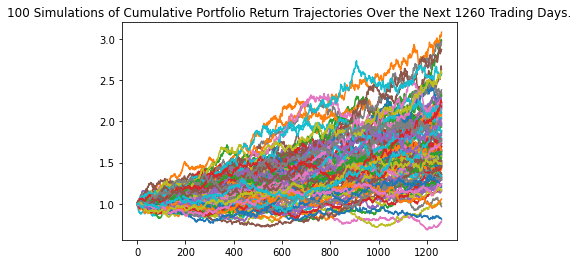

In [25]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

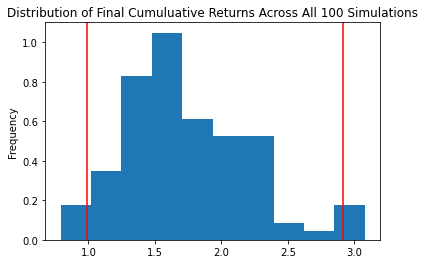

In [26]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl_five)

count           100.000000
mean              1.740323
std               0.464990
min               0.789765
25%               1.450856
50%               1.651269
75%               2.043530
max               3.080144
95% CI Lower      0.985376
95% CI Upper      2.918099
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(summary_tbl_five[9]*initial_investment_five,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $59122.56 and $175085.92


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
"""Using $60000 initial investment, """
MC_even_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500, 
    num_trading_days = 252*10)

MC_even_dist_ten.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997130,1.008128,1.006257,1.007772,1.006528,1.004197,0.998120,1.007332,1.017703,0.997318,...,0.995252,0.995027,1.002000,0.993955,1.005895,0.998164,0.998889,1.004534,1.005756,1.000740
2,0.992811,1.007517,1.017004,1.006955,1.005850,1.001095,0.998219,0.998463,1.015514,0.996378,...,0.996429,0.987842,1.008257,0.991806,1.025956,0.993094,0.998171,1.000583,1.008901,1.005625
3,0.987806,1.013345,1.018117,1.003571,1.018008,1.001788,0.989452,0.981418,1.015576,0.998635,...,1.002052,0.988611,0.982168,0.999958,1.031278,0.993441,0.989917,1.009428,1.017382,1.005461
4,0.992739,1.005638,1.010915,1.010882,0.994100,0.994495,0.993925,0.979288,1.009946,0.997759,...,0.991466,0.985038,0.984225,1.002646,1.041937,0.993026,0.992100,1.000639,1.016846,1.013275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.718310,2.991454,2.904357,3.166538,2.690822,3.041201,2.641958,1.720317,5.371646,3.088256,...,2.426287,1.307559,2.353237,2.945206,2.639408,5.941807,1.766577,4.471577,2.569397,3.754885
2517,3.663260,2.983938,2.870878,3.156742,2.703944,3.037360,2.623961,1.734341,5.339939,3.113498,...,2.440113,1.297620,2.330454,2.961240,2.622402,5.879897,1.748477,4.486989,2.573756,3.677404
2518,3.676211,2.977347,2.844218,3.163164,2.719801,3.038655,2.639829,1.706405,5.392673,3.105282,...,2.426376,1.312608,2.345110,2.965998,2.688159,5.860134,1.704966,4.451044,2.562403,3.709015
2519,3.685241,3.006317,2.862809,3.189380,2.714418,3.095096,2.616928,1.690477,5.411133,3.116779,...,2.443681,1.317154,2.347800,2.984698,2.713194,5.880108,1.686613,4.386042,2.565658,3.688306


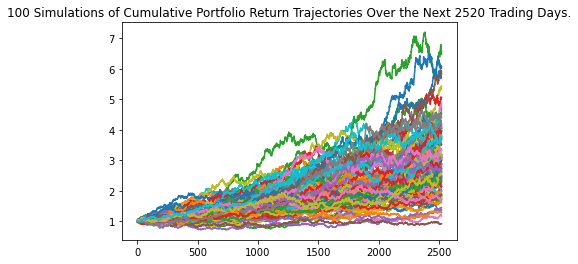

In [34]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

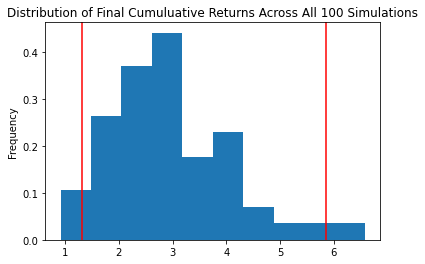

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl_ten)

count           100.000000
mean              2.975583
std               1.120109
min               0.916731
25%               2.198468
50%               2.871776
75%               3.693638
max               6.578828
95% CI Lower      1.307177
95% CI Upper      5.864171
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(summary_tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $78430.59 and $351850.27
